## REDES NEURONALES CONVOLUCIONALES - Clasificación de Imagenes  (Rosas y Tulipanes )

**Intregantes del equipo:**
- Alarcon Arias Julio Erick
- Atao Surichaqui Ester Solamyt
- Condori Mamani Nardy Liz
- Vega Pahuara Millene Nadile

En la era actual la clasificación automática de imágenes se ha convertido en una herramienta esencial en numerosos campos desde la medicina hasta la agricultura, donde nos permite a todos los sistemas computacionales identificar y categorizar contenido visual con mucha más precisión, una tarea que antes requería una intervención humana significativa, es por tal motivo que en este caso nos hemos centrado en el uso de redes neuronales convolucionales (CNNs) para la clasificación automática de imágenes de flores, específicamente las rosas y los tulipanes, el objetivo de este este código es construir un modelo de CNN que no solo identifica con precisión estas dos categorías de flores, sino que también permite explorar la eficacia de diferentes arquitecturas y técnicas de preprocesamiento en la mejora de rendimiento del modelo, lo que incluye el proceso de recuperación y preparación del conjunto de datos de las imágenes, el diseño del entrenamiento de la red neuronal y la evaluación de su rendimiento en un conjunto de datos de prueba.

# Extracción de la data


Este bloque de código utiliza "gdown" para descargar un archivo ZIP desde Google Drive, especificando el ID del archivo para crear un enlace directo para la descarga. Después, se descarga el archivo ZIP con el título "archivo.zip" y se extrae en la carpeta "/content/extracted_files". El código primero verifica la existencia de la carpeta de extracción y luego utiliza la aplicación "zipfile.ZipFile" para descomprimir el archivo ZIP en la carpeta correspondiente. Finalmente, se imprime la lista de archivos de la carpeta que se extrajeron.

In [ ]:
import gdown
import zipfile
import os

# ID del archivo de Google Drive
file_id = '1FpfmFdGJEAlI6XvNakQrJIE6lmTTvf9n'

# Formar el enlace de descarga directa usando el ID
download_url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo usando gdown
gdown.download(download_url, 'archivo.zip', quiet=False)

# Ruta al archivo ZIP descargado
zip_file_path = 'archivo.zip'

# Ruta donde deseas extraer los archivos
extract_path = '/content/extracted_files'

# Asegúrate de que la carpeta de extracción exista
os.makedirs(extract_path, exist_ok=True)

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar los archivos extraídos
print(os.listdir(extract_path))


Downloading...
From (original): https://drive.google.com/uc?id=1FpfmFdGJEAlI6XvNakQrJIE6lmTTvf9n
From (redirected): https://drive.google.com/uc?id=1FpfmFdGJEAlI6XvNakQrJIE6lmTTvf9n&confirm=t&uuid=a1479670-691c-4664-86b7-af58f4a388dc
To: /content/archivo.zip
100%|██████████| 96.0M/96.0M [00:02<00:00, 33.9MB/s]


['Data de rosas y tulipanes']


El código **"folders = os.listdir(data)"** lista los nombres de las carpetas (o archivos) dentro del directorio especificado por la variable **"data"**, que también es la ruta a la carpeta **"train"** extraída. Luego, en la consola, **"print(folders)"** imprime la lista de estos nombres. Esto le permitirá ver los nombres de las carpetas o archivos que se encuentran dentro del directorio **"train"**.


In [ ]:
data = '/content/extracted_files/Data de rosas y tulipanes/train'
folders = os.listdir(data)
print(folders)

['rose', 'tulip']


Las imágenes se procesan en un directorio estructurado en carpetas a través de este bloque de código. Para mostrar una barra de progreso, primero importa las bibliotecas numpy, cv2 (OpenCV) y tqdm. Luego, inicializa las listas vacías para almacenar los nombres de las imágenes, las etiquetas de entrenamiento y las imágenes redimensionadas.

El tamaño objetivo de las imágenes es de 120 x 120 píxeles, luego en el directorio de carpetas, itera a través de cada carpeta y, dentro de cada carpeta, itera sobre los archivos. Para cada archivo con extensión.jpg, agregue la ruta del archivo a image_names, agregue etiquetas de carpeta a train_labels y use cv2.imread para leer la imagen. La imagen se redimensiona a 120x120 píxeles con cv2.resize() y se agrega a train_images. Los archivos que no terminan en .jpg se omiten.

In [ ]:
import os
import cv2
from tqdm import tqdm

# Definir tamaño de la imagen
size = (120, 120)

# Inicializar listas para almacenar nombres de imágenes, etiquetas y datos de imágenes
image_names = []
train_labels = []
train_images = []

# Ruta a los datos
data_dir = '/content/extracted_files/Data de rosas y tulipanes/train'  # Cambia esto a tu ruta

# Directorios de las carpetas (puedes definirlo o obtenerlo de otra fuente)
folders = os.listdir(data_dir)

# Procesar cada carpeta
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    for file in tqdm(os.listdir(folder_path), desc=f'Procesando {folder}'):
        if file.lower().endswith('.jpg'):  # Asegurarse de que el archivo es una imagen jpg
            image_path = os.path.join(folder_path, file)
            image_names.append(image_path)
            train_labels.append(folder)

            # Leer y redimensionar la imagen
            img = cv2.imread(image_path)
            if img is not None:
                img_resized = cv2.resize(img, size)
                train_images.append(img_resized)
            else:
                print(f'Error al leer la imagen: {image_path}')


Procesando tulip: 100%|██████████| 984/984 [00:01<00:00, 596.40it/s]


La lista **"train_images"**, que contiene imágenes redimensionadas, se convierte en un arreglo NumPy con el código **"X1 = np.array(train_images)"**. Las dimensiones del arreglo **"X1"** se obtienen al ejecutar **"X1.shape"**, que representará la forma del conjunto de datos de imágenes.

El arreglo **"X1"** será una tupla de la forma **"(n, altura, anchura, canales)"**, donde:

- El número de imágenes en **"train_images"** es **"n"**.

Las dimensiones de cada imagen son **"altura"** y **"ancho"**, en este caso es de 120 x 120 píxeles.

El número de canales de color de las imágenes (tres para imágenes en color en formato RGB) se conoce como **"canales".**

In [ ]:
import numpy as np
X1 = np.array(train_images)

X1.shape

(1768, 120, 120, 3)

El bloque de código utiliza **"LabelEncoder"** para convertir las etiquetas de texto en números enteros, y luego usa **"to_categorical"** para convertir estas etiquetas en un encodamiento categórico con cinco clases. Las imágenes almacenadas en **"train_images"** se convierten en un arreglo NumPy, se normalizan dividiendo por 255 para ajustar los valores de píxeles al rango [0, 1], y finalmente se imprime la forma de los arreglos de imágenes y las etiquetas para verificar la preparación de los datos para el entrenamiento del modelo.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Codificar las etiquetas
le=LabelEncoder()
Y=le.fit_transform(train_labels)# Transformar las etiquetas en números enteros
Y=to_categorical(Y,5)# Convertir a formato categórico (one-hot encoding)
X=np.array(X1)# Convertir las imágenes en un arreglo NumPy y normalizar
X=X/255 # Normalizar los valores de los píxeles

# Imprimir las formas de los arreglos
print(X.shape) # Dimensiones del arreglo de imágenes
print(Y.shape) # Dimensiones del arreglo de etiquetas

(1768, 120, 120, 3)
(1768, 5)


Este bloque de código utiliza **"train_test_split"** de **"sklearn.model_selection"** para dividir el conjunto de datos en conjuntos de entrenamiento y validación. Se indica que el 20% de los datos deben reservarse para la validación (`test_size=0.20`) y se establece una semilla aleatoria (`random_state=42`) para garantizar la reproducibilidad. Después de la división, se imprimen las formas de los conjuntos de datos resultantes: **"X_train"** para imágenes de entrenamiento,**"X_val"** para imágenes de validación, **"Y_train"** para etiquetas de entrenamiento y **"Y_val"** para etiquetas de validación, lo que permite verificar la partición correcta de los datos.


In [ ]:
from sklearn.model_selection import train_test_split


# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.20, random_state=42)

# Imprimir las formas de los conjuntos de datos
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (1414, 120, 120, 3)
x_test shape (354, 120, 120, 3)
y_train shape (1414, 5)
y_test shape (354, 5)


Este bloque de código muestra una serie de imágenes en escala de grises que se obtuvieron del conjunto de entrenamiento "X_train". Utiliza un bucle "for" que itera sobre índices en un rango de 10 a 100, en pasos de 20. La imagen se muestra en escala de grises para cada índice mediante "plt.imshow(X_train[i][:,:,0], cmap='gray')" y "plt.show()" se muestra en la pantalla. Este código es útil para verificar visualmente el contenido y la calidad de las imágenes del conjunto de entrenamiento.

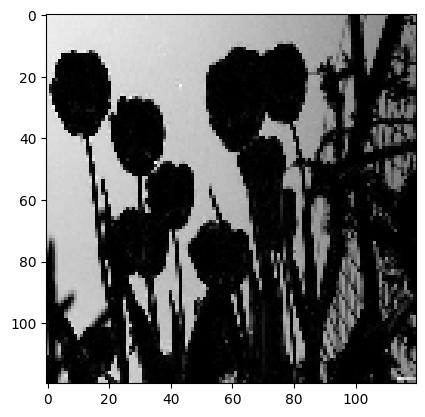

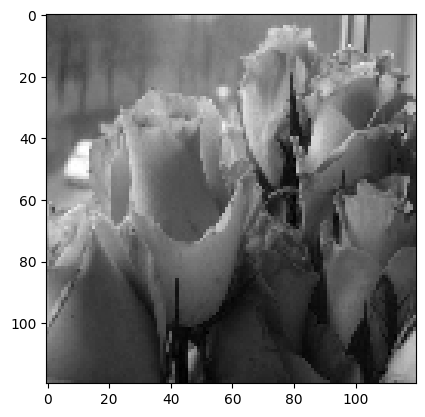

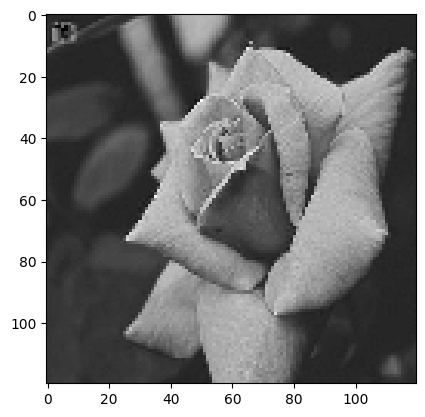

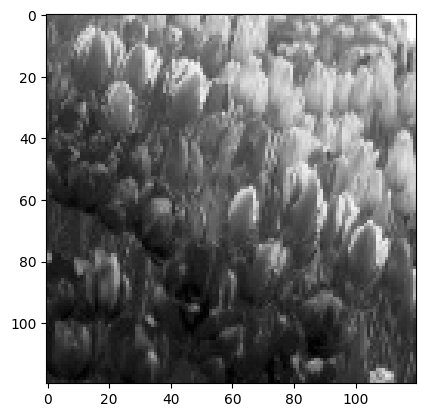

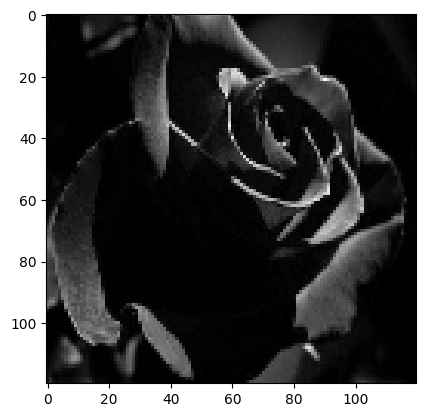

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterar sobre índices seleccionados para visualizar imágenes
for i in range(10,100,20):
    plt.imshow(X_train[i][:,:,0],cmap='gray') # Mostrar la imagen en escala de grises (primer canal)
    plt.show() # Mostrar la imagen

Este código carga imágenes de los subdirectorios de la carpeta "rose" y "tulip", las reduce a un tamaño predeterminado, las normaliza (escalando los valores de píxeles entre 0 y 1) y las organiza en una lista junto con sus etiquetas correspondientes (0 para "rosas" y 1 para "tulipanes"). Luego, muestra las imágenes en una cuadrícula con "matplotlib", asignando a cada imagen su clase ("Roses" o "Tulips"). El uso de "plt.tight_layout()" garantiza que las imágenes se ajusten bien dentro de la figura y no se solapen, mientras que "plt.imshow()" muestra las imágenes individualmente sin ejes visibles para una mejor visualización.

In [ ]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_subdirectories(folder, img_size=(64, 64), sample_count=10):
    images = []
    labels = []
    label_names = []

    # Recorrer subdirectorios 'roses' y 'tulips'
    for subdir in ['rose', 'tulip']:
        subdir_path = os.path.join(folder, subdir)

        if os.path.isdir(subdir_path):
            print(f"Cargando imágenes desde el subdirectorio: {subdir}")

            # Listar archivos en el subdirectorio
            filenames = os.listdir(subdir_path)
            random.shuffle(filenames)  # Barajar archivos

            for img in filenames[:sample_count]:
                img_path = os.path.join(subdir_path, img)
                if os.path.isfile(img_path):  # Verificar si es un archivo
                    try:
                        img_pil = Image.open(img_path).convert('RGB')
                        img_pil = img_pil.resize(img_size)
                        img_np = np.array(img_pil) / 255.0  # Normalizar valores de píxeles
                        images.append(img_np)
                        labels.append(0 if subdir == 'rose' else 1)  # Etiqueta: 0 para rosas, 1 para tulipanes
                        label_names.append(subdir.capitalize())  # Almacenar el nombre de la clase
                    except Exception as e:
                        print(f"Error cargando la imagen {img}: {e}")
                else:
                    print(f"Omitiendo {img_path}, no es un archivo de imagen.")

    return np.array(images), np.array(labels), label_names

def display_images(images, label_names, img_size=(64, 64)):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i+1)  # Ajustar el número de subplots según el número de imágenes
        plt.imshow(images[i])
        plt.title(label_names[i])
        plt.axis('off')
    plt.show()

Cargando imágenes desde el subdirectorio: rose
Cargando imágenes desde el subdirectorio: tulip


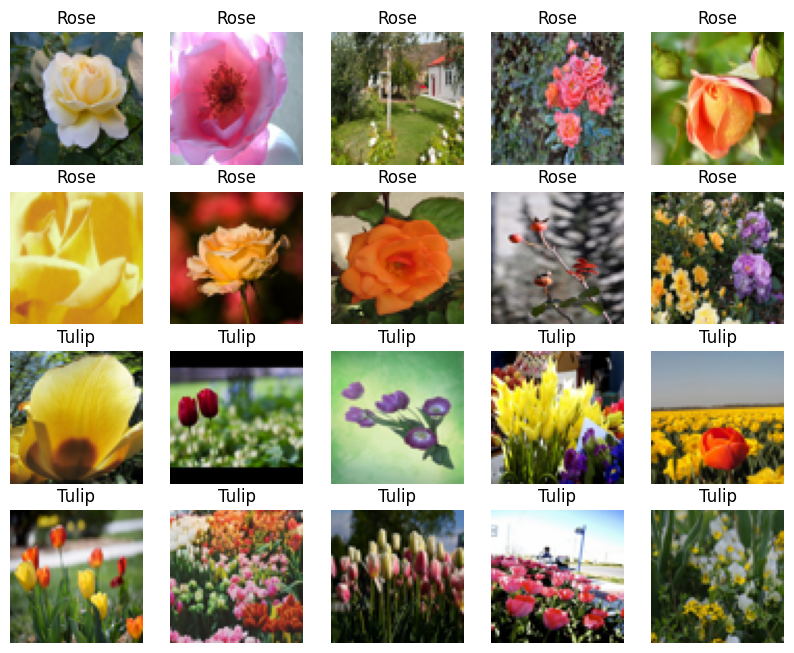

In [ ]:
# Cargar imágenes de rosas y tulipanes
folder_path = '/content/extracted_files/Data de rosas y tulipanes/train'
images, labels, label_names = load_images_from_subdirectories(folder_path)

# Imprimir las imágenes
display_images(images, label_names)

# IMPORTACION DEL MODELO

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Actualiza la importación de to_categorical
from tensorflow.keras.utils import to_categorical  # Convertir a one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

Este bloque de código define una red neuronal convolucional (CNN) en Keras con una serie de capas convolucionales, de agrupamiento y densas para clasificar las imágenes en cinco clases. Comienza con una capa convolucional que aplica 96 filtros con activación ReLU. Luego viene un **"AveragePooling2D"** y una capa de salida con una tasa del 20%. Las siguientes capas convolucionales utilizan 128, 160, 192 y 256 filtros para repetir este patrón. Después, el modelo aplanará la salida de las capas convolucionales y pasará por una capa densa con 512 unidades y activación ReLU, otra capa de salida y finalmente una capa de salida densa con 5 unidades y activación softmax para obtener probabilidades de clasificación en cinco categorías.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense

# Crear el modelo secuencial
model = Sequential()

# Capa convolucional, pooling y dropout
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(120,120,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=160, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=192, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Capas densas y de salida
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


El optimizador Adam se inicia con este bloque de código para entrenar el modelo de la red neuronal. El optimizador Adam se configura con una tasa de aprendizaje **("learning_rate")** de 0.001, y los parámetros de momento **"beta_1"** y **"beta_2"** se establecen en 0.9 y 0.999, respectivamente. La actualización de los gradientes y las tasas de decaimiento del momento son controladas por estos parámetros, lo que ayuda a mejorar la convergencia del modelo durante el entrenamiento. Antes de comenzar el entrenamiento, se puede compilar el modelo con este optimizador.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Inicializar el optimizador Adam con el parámetro actualizado
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Este bloque de código utiliza el optimizador Adam que se definió previamente para compilar el modelo de la red neuronal. Se especifica la función de pérdida **"categorical_crossentropy"**, que es adecuada para problemas de clasificación multiclase, y se establece la métrica de evaluación como **"precisión"** para monitorear la precisión del modelo durante el entrenamiento. Antes de comenzar el proceso de entrenamiento, se debe compilar el modelo. Este comando prepara el modelo para el entrenamiento y la evaluación, estableciendo cómo se actualizarán los pesos durante el entrenamiento y qué métricas se utilizarán para evaluar el rendimiento.

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Para agregar más datos al conjunto de entrenamiento, el código configura un generador de datos de imágenes. La rotación (hasta 10 grados), el zoom (hasta el 80% del tamaño original) y los desplazamientos horizontales y verticales (hasta el 80% del tamaño de la imagen) están habilitados, mientras que se desactivan el giro horizontal y vertical y las técnicas de normalización y aclaramiento. Para mejorar la generalización del modelo, se puede ajustar el generador a los datos de entrenamiento mediante la llamada a **"datagen.fit(X_train)"**.

In [ ]:
# Configurar el generador de datos con augmentación
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.8,
        width_shift_range=0.8,
        height_shift_range=0.8,
        horizontal_flip=False,
        vertical_flip=False)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(X_train)

Este comando genera unresumen detallado de la arquitectura del modelo de red neuronal se puede obtener utilizando el comando **"model.summary()"**, que muestra el tipo de cada capa, la forma de la salida de cada capa y la cantidad de parámetros entrenables y no entrenables, tanto por capa como en total. Antes de comenzar el entrenamiento, este resumen es esencial para revisar la configuración del modelo, verificar la implementación correcta de las capas y asegurarse de que el número de parámetros sea el esperado.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 118, 118, 96)        │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 59, 59, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 59, 59, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 57, 57, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 28, 28, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 160)         │         184,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 13, 13, 160)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 192)         │         276,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 192)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         442,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 1, 1, 256)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,151,333 (4.39 MB)

 Trainable params: 1,151,333 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

Este bloque de código utiliza el método **"fit()"** de Keras para entrenar el modelo de red neuronal. Se entrena utilizando los datos de entrenamiento **"X_train"** y **"Y_train"**, con un tamaño de lote de 256 imágenes por iteración y realizando un total de 30 épocas. Además, se especifican los datos de validación X_val y Y_val para evaluar el rendimiento del modelo durante el entrenamiento. El conjunto de entrenamiento y el conjunto de validación almacenan los resultados del entrenamiento en la variable **"history"**, que contiene información sobre la pérdida y la precisión del modelo en cada momento. Este historial es útil para analizar el progreso del entrenamiento y, si es necesario, realizar ajustes.

In [ ]:
history = model.fit(X_train,Y_train, batch_size=256, epochs = 30, validation_data = (X_val,Y_val))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.4178 - loss: 1.2820 - val_accuracy: 0.5452 - val_loss: 0.7465
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 240ms/step - accuracy: 0.5187 - loss: 0.7795 - val_accuracy: 0.4548 - val_loss: 0.7129
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.5384 - loss: 0.7192 - val_accuracy: 0.4548 - val_loss: 0.7198
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.5054 - loss: 0.7376 - val_accuracy: 0.5452 - val_loss: 0.7013
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.5357 - loss: 0.7207 - val_accuracy: 0.5452 - val_loss: 0.7045
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.5335 - loss: 0.6994 - val_accuracy: 0.5480 - val_loss: 0.6854
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.5240 - loss: 0.6963 - val_accuracy: 0.5452 - val_loss: 0.6836
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.5384 - loss: 0.6989 - val_accuracy: 0.5424 - val_loss: 

### Rendimiento del modelo

Este bloque de código utiliza los datos de pérdida almacenados en el objeto **"history"** para trazar un gráfico que muestra la evolución de la pérdida del modelo durante el entrenamiento. La pérdida en el conjunto de entrenamiento *(`history.history['loss']`) y la pérdida en el conjunto de validación (`history.history['val_loss']`) son las dos curvas generadas. El gráfico "Modelo de pérdida" muestra la pérdida en función de los años y tiene una leyenda que distingue entre las curvas de entrenamiento y validación. Se muestra utilizando "plt.show()". Esto facilita la visualización del progreso del entrenamiento y la evaluación

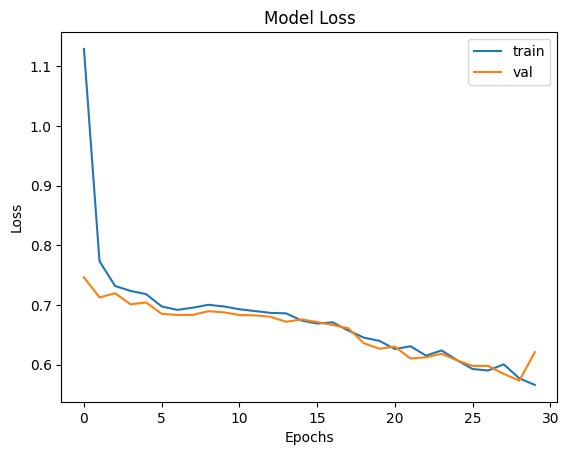

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Este bloque de código utiliza los datos de precisión del objeto "history" para trazar un gráfico que muestra cómo cambia la precisión del modelo durante el entrenamiento. Se muestran dos curvas en el conjunto de entrenamiento (`history.history['accuracy']`) y en el conjunto de validación (`history.history['val_accuracy']`). El gráfico "Model Accuracy" muestra la precisión en el eje y las épocas en el eje x, con una leyenda que distingue entre las curvas de entrenamiento y validación. Esto permite evaluar cómo mejora la precisión del modelo con el tiempo y comparar su desempeño en ambos conjuntos de datos.

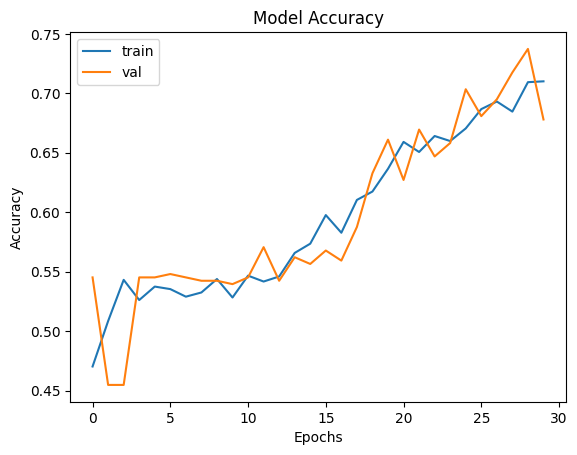

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

### Almacenar y cargar el modelo de red neuronal en Keras

Este bloque de código especifica dos métodos para almacenar y cargar el modelo de red neuronal en Keras. La función **"guardarRNN"** serializa la arquitectura del modelo a un formato JSON y guarda los pesos en un archivo HDF5, mientras que la función **"cargarRNN"** lee la arquitectura del archivo JSON y carga los pesos desde el archivo HDF5 para reconstruir el modelo. Al permitir su almacenamiento y recuperación, estas funciones facilitan la persistencia y reutilización del modelo entrenado.

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json


from keras import layers
from keras import models



def guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos):
    print("Guardando Red Neuronal en Archivo")
    # serializar modelo a JSON

    # Guardar los Pesos (weights)
    model.save_weights(nombreArchivoPesos+'.h5')

    # Guardar la Arquitectura del modelo
    with open(nombreArchivoModelo+'.json', 'w') as f:
        f.write(model.to_json())

    print("Red Neuronal Grabada en Archivo")

def cargarRNN(nombreArchivoModelo,nombreArchivoPesos):

    # Cargar la Arquitectura desde el archivo JSON
    with open(nombreArchivoModelo+'.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar Pesos (weights) en el nuevo modelo
    model.load_weights(nombreArchivoPesos+'.h5')

    print("Red Neuronal Cargada desde Archivo")
    return model

Para evaluar y guardar un modelo de red neuronal, este bloque de código realiza una serie de acciones importantes. Primero, utiliza **"model.summary()"** para mostrar un resumen de la arquitectura del modelo. Luego, evalua el modelo en los conjuntos de entrenamiento y prueba **(X_train, Y_train, X_val y Y_val)**, e imprime los resultados en cada uno. Posteriormente, establece una función **"guardarRNN"** para almacenar la arquitectura del modelo y los pesos en un archivo JSON. Por último, llama a esta función para guardar el modelo y recibe un mensaje que indica que el modelo se ha guardado exitosamente.

In [ ]:
# Paso 1: Mostrar el resumen del modelo
model.summary()

# Paso 2: Evaluación del modelo en conjunto de entrenamiento
print('Resultado en Train:')
train_score = model.evaluate(X_train, Y_train, verbose=0)
print(f"{model.metrics_names[1]}: {train_score[1]*100:.2f}%")

# Paso 3: Evaluación del modelo en conjunto de prueba
print('Resultado en Test:')
test_score = model.evaluate(X_val, Y_val, verbose=0)
print(f"{model.metrics_names[1]}: {test_score[1]*100:.2f}%")

# Paso 4: Guardar el modelo y los pesos
nombreArchivoModelo = 'arquitectura_base.json'
nombreArchivoPesos = 'pesos_base.weights.h5'

def guardarRNN(model, nombreArchivoModelo, nombreArchivoPesos):
    # Guardar la arquitectura del modelo en un archivo JSON
    model_json = model.to_json()
    with open(nombreArchivoModelo, "w") as json_file:
        json_file.write(model_json)

    # Guardar los pesos del modelo en un archivo .weights.h5
    model.save_weights(nombreArchivoPesos)

# Llamar a la función para guardar el modelo
guardarRNN(model, nombreArchivoModelo, nombreArchivoPesos)

# Mostrar un mensaje indicando que el modelo ha sido guardado
print("Guardando Red Neuronal en Archivo.")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 118, 118, 96)        │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 59, 59, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 59, 59, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 57, 57, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 28, 28, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 160)         │         184,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 13, 13, 160)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 192)         │         276,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 192)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         442,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 1, 1, 256)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 3,454,001 (13.18 MB)

 Trainable params: 1,151,333 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,302,668 (8.78 MB)

Resultado en Train:
compile_metrics: 68.95%
Resultado en Test:
compile_metrics: 67.80%
Guardando Red Neuronal en Archivo.


#PREPARACION DE LOS DATOS

Hacer las funciones para obtener el conjunto de capacitación y validación de las imágenes

In [ ]:
# Listas para almacenar las imágenes y etiquetas
X=[]
Z=[]

# Tamaño de la imagen a la que se redimensionarán todas las imágenes
IMG_SIZE=150 # Ajusta según tus necesidades

FLOWER_TULIP_DIR='/content/extracted_files/Data de rosas y tulipanes/train/tulip'
FLOWER_ROSE_DIR='/content/extracted_files/Data de rosas y tulipanes/train/rose'

Este bloque de código especifica dos procesos para procesar imágenes y etiquetarlas. Para cada imagen, la función **"assign_label"** simplemente devuelve el tipo de flor (**"flower_type"**) como etiqueta. La función **"make_train_data"** examina todas las imágenes en un directorio predeterminado ("DIR"), utiliza OpenCV para leer y ajustar su tamaño, y luego agrega la imagen procesada a la lista **"X"** y su etiqueta correspondiente a la lista **"Z"**. Durante el procesamiento de imágenes, se utiliza **"tqdm"** para mostrar una barra de progreso. Estas funciones producen datos de entrenamiento para el modelo de clasificación de imágenes.

In [ ]:
def assign_label(img,flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

Para procesar las imágenes en dos tipos distintos de flores, este bloque de código llama a la función **"make_train_data"** dos veces. Primero, se procesa el directorio de imágenes de tulipanes (**FLOWER_TULIP_DIR**) y se imprime la cantidad de imágenes procesadas en la lista **"X"**. Luego, se procesan las imágenes del directorio de rosas (**FLOWER_ROSE_DIR**) y se imprimen todas las imágenes en **"X"**. De esta manera, puede ver cuántas imágenes se han agregado a la lista **"X"** para ambos tipos de flores.




In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X)) # Imprime el número de imágenes procesadas para 'Tulip'

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X)) # Imprime el número total de imágenes procesadas, incluyendo las de 'Rose'

100%|██████████| 984/984 [00:01<00:00, 742.04it/s]


984


100%|██████████| 784/784 [00:00<00:00, 809.02it/s]

1768


## Visualizando algunas imágenes aleatorias

Utilizando Matplotlib, este bloque de código crea una cuadrícula de imágenes de flores aleatorias. Primero, importa las bibliotecas requeridas y establece las dimensiones del gráfico con **"fig.set_size_inches"**. Luego, se utiliza **"plt.subplots"** para crear una cuadrícula de cinco filas con dos columnas de subgráficas ("ax"). Se utilizan índices aleatorios en un bucle anidado para seleccionar imágenes de la lista **"X"** y sus correspondientes etiquetas en **"Z"**, que se muestran en las subgráficas. Por último, pero no menos importante, **"plt.tight_layout()"** regula el espacio de espacio para que no haya superposiciones, y **"plt.show()"** muestra el gráfico generado.


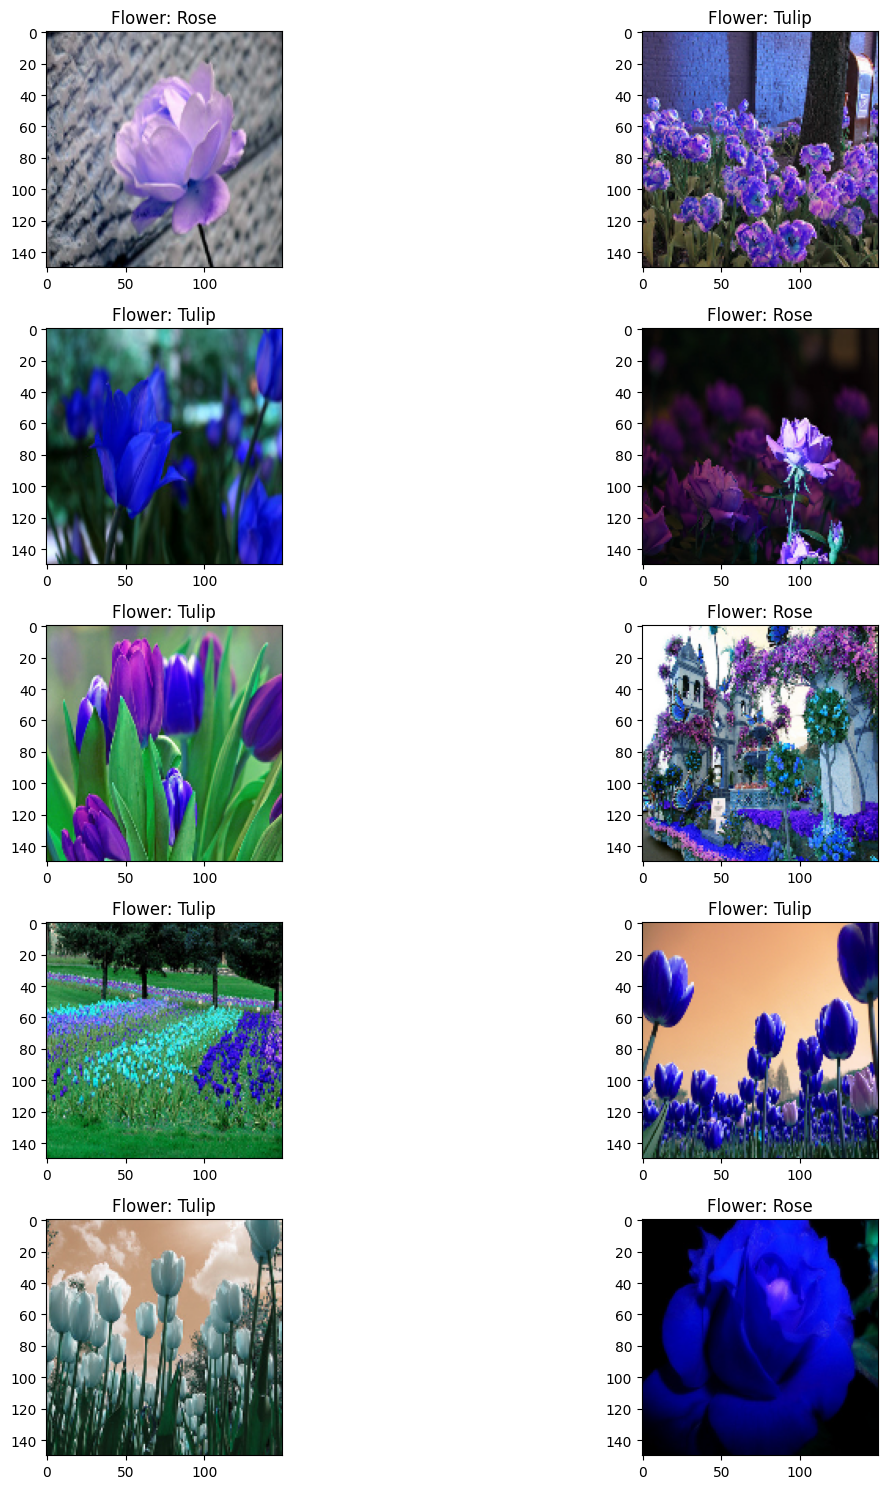

In [ ]:
import random as rn

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z)) # Asegúrate de usar len(Z) - 1 para evitar índices fuera de rango
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout() # Añadir para asegurar que se muestre el gráfico

Los datos se preparan para el entrenamiento del modelo de red neuronal a través de este bloque de código. Primero, se utiliza **LabelEncoder** para convertir las etiquetas de texto en números enteros (Y). Luego se aplica **to_categorica**l para convertir estos enteros en codificación **one-hot**. Esto es adecuado para la clasificación multiclase con cinco categorías. Las imágenes de la lista **X** se convierten en un array de NumPy y se normalizan dividiéndolas por 255 para escalar los valores de píxeles al rango [0, 1], lo cual es una práctica común en el preprocesamiento de datos de imágenes para redes neuronales.

In [ ]:
# Codificar etiquetas en números enteros
le=LabelEncoder()
Y=le.fit_transform(Z)

# Convertir las etiquetas a codificación one-hot
Y=to_categorical(Y,5)

 #Convertir las imágenes a un array de NumPy y normalizar
X=np.array(X)
X=X/255

Este bloque de código también muestra dos métodos para almacenar y cargar un modelo de red neuronal en Keras. La función **"guardarRNN"** guarda la arquitectura del modelo y los pesos en un archivo JSON, lo que permite mantener el estado del modelo entrenado. La función **"cargarRNN"** reconstruye el modelo cargando la arquitectura y los pesos del archivo JSON y HDF5. Esto facilita la reutilización del modelo para entrenamiento o inferencia adicional sin tener que rehacer la arquitectura desde cero.

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json

from keras.applications.resnet import ResNet50
from keras import layers
from keras import models



def guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos):
    print("Guardando Red Neuronal en Archivo")
    # serializar modelo a JSON

    # Guardar los Pesos (weights)
    model.save_weights(nombreArchivoPesos+'.h5')

    # Guardar la Arquitectura del modelo
    with open(nombreArchivoModelo+'.json', 'w') as f:
        f.write(model.to_json())

    print("Red Neuronal Grabada en Archivo")

def cargarRNN(nombreArchivoModelo,nombreArchivoPesos):

    # Cargar la Arquitectura desde el archivo JSON
    with open(nombreArchivoModelo+'.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar Pesos (weights) en el nuevo modelo
    model.load_weights(nombreArchivoPesos+'.h5')

    print("Red Neuronal Cargada desde Archivo")
    return model

 # División en conjuntos de entrenamiento y validación

Este bloque de código utiliza **"train_test_split**" de **"sklearn"** para dividir el conjunto de datos en subconjuntos de entrenamiento y prueba para la validación. Se asigna el 25% de los datos al conjunto de prueba (`x_test`, `y_test`) y el 75% restante al conjunto de entrenamiento (`x_train`, `y_train`) cuando **"test_size=0.25"**. El parámetro **"random_state=42"** garantiza que la división sea repetible, produciendo el mismo subconjunto de datos cada vez que se ejecute el código con esa semilla. Esto es beneficioso para entrenar y evaluar regularmente los modelos.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Establecer las semillas aleatorias

Al fijar las semillas de generadores de números aleatorios en "numpy", "random" y "TensorFlow" utilizando el valor 42, este bloque de código establece la reproducibilidad para el análisis de datos y el entrenamiento de modelos. Esto garantiza que los resultados obtenidos al ejecutar el código sean consistentes en diferentes ejecuciones, lo que permite una comparación precisa y confiable de los experimentos. La configuración de reproducibilidad garantiza que cualquier resultado aleatorio, como la selección de datos o la inicialización de pesos, sea el mismo en cada ejecución después de establecer estas semillas.

In [ ]:
import tensorflow as tf  # Importar TensorFlow y asignarle el alias tf
# Establecer las semillas para reproducibilidad
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

#MODELADO

## Construyendo el modelo ConvNe

La red comienza con una capa **"Conv2D"** con 32 filtros y un kernel de 5x5. Luego, para reducir las dimensiones espaciales, se agrega una capa **"MaxPooling2D"**. Para continuar con la reducción espacial y la extracción de características, se agregan más capas **"Conv2D"** con 64, 96, y 96 filtros, cada una de las cuales se sigue por una capa **"MaxPooling2D"**. Para convertir las características en un vector 1D, la red se aplana con una capa **"Flatten"**. Luego, la red se conecta a una capa **"Dense"** con 512 neuronas y una función de activación ReLU. Finalmente, la capa **"Dense"** es la capa de salida, que cuenta con cinco neuronas y una función de activación softmax, lo que es adecuado para una clasificación multiclase con cinco categorías para el aumento de datos.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
# Definir el modelo
model = Sequential()

# Opcionalmente, para evitar la advertencia, podrías usar Input:
# from keras.layers import Input
# model.add(Input(shape=(150, 150, 3)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Usando un recortador LR

Para ajustar la tasa de aprendizaje del modelo durante el entrenamiento, este bloque de código configura un callback **"ReduceLROnPlateau"** en Keras. Cuando no hay mejora en la métrica monitorizada, en este caso, **"val_acc"** (precisión en el conjunto de validación), **"ReduceLROnPlateau"** reduce la tasa de aprendizaje. Si no hay mejora en tres ocasiones seguidas, la tasa de aprendizaje disminuirá, según el parámetro **"patience=3"**. Según **"factor=0.1"**, la tasa de aprendizaje disminuirá a una décima parte de su valor actual. Los mensajes que indican la disminución de la tasa de aprendizaje durante el entrenamiento se pueden imprimir con el parámetro **"verbose=1"**.

In [ ]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## Aumento de datos para evitar el sobreajuste

Durante el entrenamiento del modelo, este bloque de código configura el objeto de **"ImageDataGenerator"** en Keras para agregar datos adicionales a las imágenes, aplicando transformaciones aleatorias para mejorar la generalización. Las imágenes pueden ser rotadas hasta diez grados, ampliadas hasta un diez por ciento, desplazadas hasta un veinte por ciento horizontal y verticalmente y volteadas horizontalmente. El blanqueamiento ZCA, la normalización por desviación estándar y la normalización centrada no se aplican. Finalmente, el generador se prepara para aplicar estas transformaciones durante el entrenamiento del modelo mediante el uso de **"datagen.fit(x_train)"** para ajustar las imágenes de entrenamiento.

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, # establece la media de entrada a 0 sobre el conjunto de datos
        samplewise_center=False,  # establece cada media de muestra en 0
        featurewise_std_normalization=False, # dividir entradas por estándar del conjunto de datos
        samplewise_std_normalization=False, # divide cada entrada por su estándar
        zca_whitening=False,  # aplicar blanqueamiento ZCA
        rotation_range=10,  # rotar imágenes al azar en el rango (grados, 0 a 180)
        zoom_range = 0.1, # Ampliar aleatoriamente la imagen
        width_shift_range=0.2, # mover imágenes al azar horizontalmente (fracción del ancho total)
        height_shift_range=0.2, # mover imágenes al azar verticalmente (fracción de la altura total)
        horizontal_flip=True, # voltear imágenes al azar
        vertical_flip=False) # voltear imágenes al azar


datagen.fit(x_train)

## Compilación del modelo y resumen de Keras

Este bloque de código configura el optimizador Adam para el modelo de Keras, estableciendo el argumento **"learning_rate"** para una tasa de aprendizaje de 0.001 igualwue el anterior. Luego, compila el modelo utilizando este optimizador, especificando **"categorical_crossentropy"** como la función de pérdida, que es adecuada para problemas de clasificación multiclase, y **"precisión"** como la métrica para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación. Esto prepara el modelo para el entrenamiento modificando sus parámetros para reducir la pérdida y aumentar la precisión.

In [ ]:
# Configurar el optimizador con el nuevo argumento 'learning_rate'
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Resumen del modelo

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

##Encajar en el conjunto de entrenamiento y hacer predicciones en el conjunto de validación



Este bloque de código entrena el modelo utilizando el método **"fit"** en lugar del método **"fit_generator"**, utilizando un flujo de datos creado por **"datagen.flow"** para realizar aumentos de datos mientras se entrena. Este flujo de datos para el conjunto de entrenamiento (x_train y y_train) con un tamaño de lote de 180 imágenes se recibe mediante el método **"fit"**. El modelo se entrena durante 60 épocas y se valida en cada época utilizando el conjunto de pruebas (**"x_test"** y **"y_test"**). Para garantizar que se procesen todas las imágenes en cada época, el parámetro **"steps_per_epoch"** se obtiene dividiendo el número total de imágenes de entrenamiento por el tamaño del lote. **"Verbose=1"** muestra el progreso del entrenamiento.

In [ ]:
batch_size=128
epochs=60

history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 987ms/step - accuracy: 0.3727 - loss: 1.1971 - val_accuracy: 0.5860 - val_loss: 0.6759
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5234 - loss: 0.7221 - val_accuracy: 0.6131 - val_loss: 0.6706
Epoch 3/60


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.5362 - loss: 0.6929 - val_accuracy: 0.6109 - val_loss: 0.6542
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6328 - loss: 0.6508 - val_accuracy: 0.6086 - val_loss: 0.6532
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 491ms/step - accuracy: 0.5596 - loss: 0.6917 - val_accuracy: 0.4661 - val_loss: 0.7064
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4922 - loss: 0.7021 - val_accuracy: 0.5407 - val_loss: 0.6870
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.6041 - loss: 0.6748 - val_accuracy: 0.6176 - val_loss: 0.6590
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 0.6617 - val_accuracy: 0.6403 - val_loss: 0.6401
Epoch 9/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.6289 - loss: 0.6360 - val_accuracy: 0.6380 - val_loss: 0.6353
Epoch 10/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6797 - loss: 0.6300 - val_accuracy: 0.6131 - val_lo

Para cargar el modelo de red neuronal previamente guardado, este bloque de código especifica la función **"cargarRNN"**. En primer lugar, carga la arquitectura del modelo desde un archivo JSON, utilizando **"model_from_json"** para crear un modelo a partir de esa arquitectura. Luego, aplica los pesos del modelo al nuevo modelo desde un archivo HDF5 (`.h5`). La función devuelve el modelo completo con arquitectura y pesos cargados, listo para predicciones o entrenamiento.

In [ ]:
from tensorflow.keras.models import model_from_json

def cargarRNN(nombre_archivo_modelo, nombre_archivo_pesos):
    # Cargar la Arquitectura desde el archivo JSON
    with open(nombre_archivo_modelo + '.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar los pesos en el modelo
    model.load_weights(nombre_archivo_pesos + '.h5')

    return model


Esta sección de código especifica la función **"guardarRNN"** que permite almacenar un modelo de red neuronal en archivos igualvomo en anterioes casos. Primero, se utiliza **"modelo.to_json()"** para serializar la arquitectura del modelo a un formato JSON y luego se guarda en un archivo con la extensión **".json"**. Luego, usa el método **"save_weights"** para guardar los pesos del modelo en un archivo con extensión **".h5"**. Esta función permite el almacenamiento de la estructura del modelo y los parámetros entrenados, lo que facilita la carga y reutilización del modelo en el futuro.

In [ ]:
def guardarRNN(modelo, nombreArchivoModelo, nombreArchivoPesos):
    # Guardar la arquitectura del modelo
    model_json = modelo.to_json()
    with open(nombreArchivoModelo + '.json', 'w') as f:
        f.write(model_json)

    # Guardar los pesos del modelo
    modelo.save_weights(nombreArchivoPesos + '.h5')


#Evaluación del desempeño del modelo actualizado

Este bloque muestra el gráfico, proporcionando una visualización clara de cómo la pérdida del modelo cambia con el tiempo durante el entrenamiento en el aumento de datos, es el rendimiento actualizado.

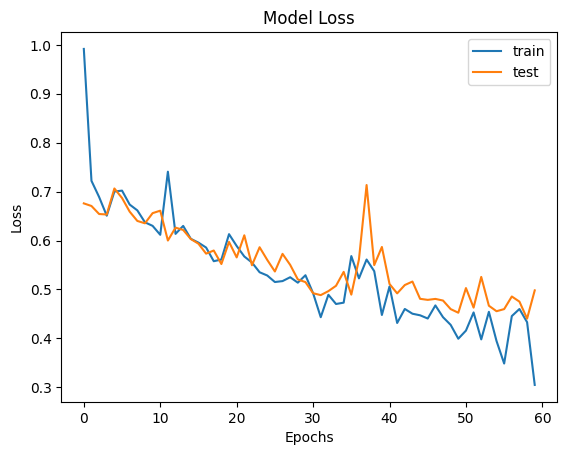

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

En este bloque muestra el gráfico, proporcionando una visualización clara del desempeño del modelo en términos de precisión durante el entrenamiento en el aumento de datos, y es el rendimiento actualizado.

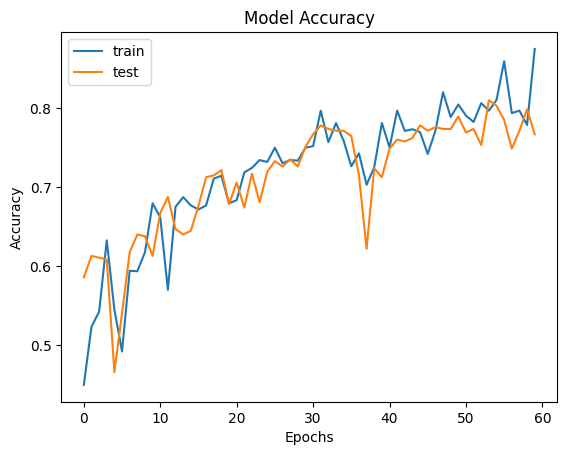

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Visualización de predicciones en el conjunto de validación

Este bloque de código utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba. Primero, **"model.predict(x_test)"** genera las predicciones del modelo para las imágenes en **"x_test"**, devolviendo las probabilidades para cada clase. Luego, las probabilidades se convierten en etiquetas de clase predichas utilizando "**np.argmax(pred, axis=1)"**, que selecciona la clase con la mayor probabilidad para cada imagen. Las etiquetas de clase predichas, que corresponden a las clases más probables para cada muestra en el conjunto de prueba, se encuentran en **"pred_digits"**.

In [ ]:
# obteniendo predicciones sobre el conjunto de valores.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


El objetivo del código es identificar ejemplos que están correctamente o mal clasificados en un conjunto de datos de prueba. Para lograrlo, utiliza dos bucles **"for"** que recorren las etiquetas verdaderas y las predicciones del conjunto de prueba. La lista **"prop_class"** almacena los índices de las primeras 4 instancias correctamente clasificadas, mientras que la lista **"mis_class"** almacena los índices de las primeras 4 instancias mal clasificadas. El nuevo método simplifica la lógica y elimina la necesidad de detener manualmente los bucles, asegurando que solo se consideren los primeros 4 ejemplos de cada categoría.

In [ ]:
# ahora almacena algunos índices correctamente clasificados '.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

## IMÁGENES DE FLOR CORRECTAMENTE CLASIFICADAS


Este código muestra las imágenes del conjunto de prueba correctamente clasificadas, destacando si la predicción del modelo y la etiqueta real corresponden a "Tulip" o "Rose". Para lograr esto, el código examina todas las imágenes que se han clasificado correctamente ("prop_class") y las muestra junto con los títulos que indican si la flor esperada y la flor real son un tulipán o una rosa. Las etiquetas codificadas se traducen en nombres de flores utilizando el código "le.inverse_transform". Luego, verifica si corresponden a "Tulip" o "Rose", ajustando los títulos en consecuencia. Al concentrarse únicamente en estas dos categorías, esto facilita la comprensión.


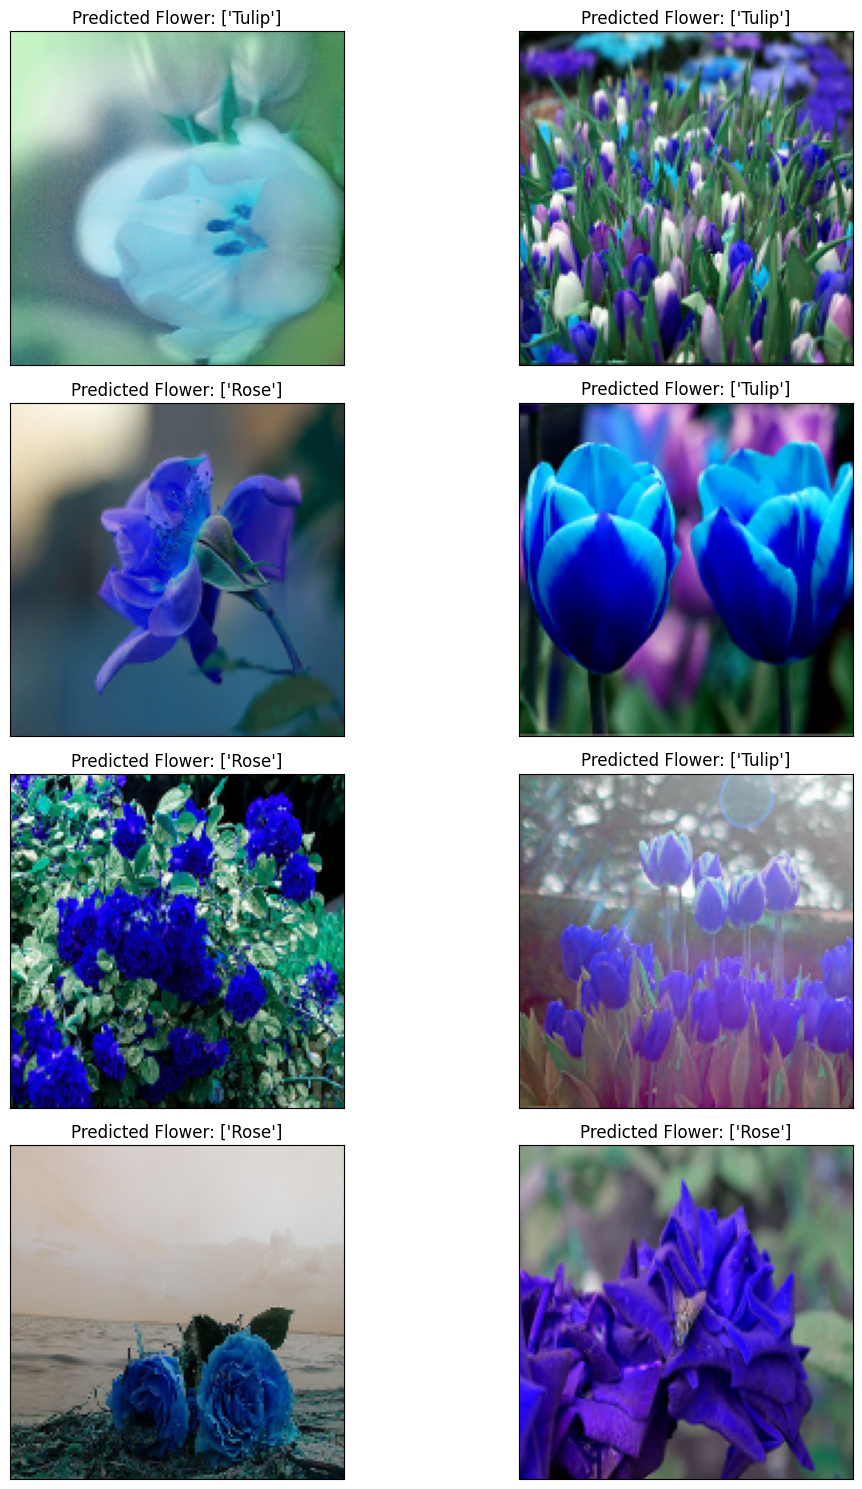

In [50]:
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        ax[i, j].set_title(
            "Predicted Flower: " + str(le.inverse_transform([pred_digits[prop_class[count]]]))
        )
        ax[i, j].set_xticks([])  # Eliminar los ticks del eje X
        ax[i, j].set_yticks([])  # Eliminar los ticks del eje Y
        plt.tight_layout()
        count += 1

plt.show()


Como conclusión obtenemos que el CNN llega a ser una poderosa herramienta de inteligencia artificial en las clasificaciones de patrones, dado que en esta práctica propusimos una arquitectura de CNN para poder llegar a clasificar las diferentes clases imágenes de flores que existen en nuestra Data set, en la arquitectura llega a estar diseñada con cuatro capas convolucionales donde cada capa utiliza diferentes tamaños de ventana de filtrado y esto llega a mejorar la velocidad y así de la misma manera mejorar la precisión en el reconocimiento de las imágenes  por lo cual si cumple con el objetivo principal de poder identificar que tipo de flor es de acuerdo a las imágenes.